## **Introducción a Scikit-learn**
---------------

Scikit-learn (sklearn) es la librería Python más popular para el Aprendizaje Automático. Incluye gran cantidad de modelos predictivos como:

* Modelos de vecinos
* Árboles de decisión
* Ensembles
* Modelos lineales generalizados
* Máquinas de vectores de soporte
* Redes neuronales artificiales clásicas
* Procesos gaussianos
* Transformación lineal de variables y una gran cantidad de utilidades como técnicas de búsqueda de meta-parámetros, de validación cruzada, cargadores de datasets de juguete, etc.

La clase más importante de sklearn y la base de toda su estructura es el estimator. Esta clase incluye tanto modelos predictivos, de la clase predictor, como transformadores de variables, de la clase transformer.

Los objetos de la clase estimator siempre tienen los siguientes métodos:

* init: recibe como argumentos los meta-parámetros del modelo y los guarda como atributos
* fit: recibe como argumentos los datos de entrenamiento (las features X y si el modelo es supervisado también los targets y)
* score: recibe como argumentos los datos de test (X y si el modelo es supervisado también y) y estima la bondad del modelo entrenado con una métrica apropiada
A su vez, los objetos de la clase predictor tienen el método

* predict: recibe como argumento las features X y calcula predicciones para las y y los objetos de la clase transformer tienen el método
* transform: recibe como argumento las features X y calcula sus transformaciones

La clase predictor se divide a su vez en las clases classifier, regressor y cluster, que tienen los mismos métodos pero están adaptadas a problemas de clasificación, regresión o clustering, respectivamente. La diferencia fundamental entre ellos es que las métricas usadas por score son distintas en cada caso, y los objetos de la clase cluster no reciben el argumento y en sus métodos.

**Clasificador básico para el dataset Iris**

Vamos a construir un modelo básico de vecinos para el dataset de clasificación de Iris. Este problema consiste en predecir categorías, así que hay que utilizar modelos de clase classifier.

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
from sklearn.neighbors import KNeighborsClassifier
predictor = KNeighborsClassifier(n_neighbors=3)

In [8]:
predictor.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
predictor.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
predictor.score(X,y)

0.96

0.96 de **accuracy** es muy buen resultado, pero estamos cometiendo un error metodológico que nos lleva a sobreestimar la calidad del modelo entrenado: no se debe hacer score con los mismos datos con los que se ha hecho fit. Lo recomendable es hacer validación cruzada o al menos particiones de train y test.

In [13]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
predictor.fit(X, y)
predictor.score(X_test, y_test)

1.0

Ahora sí estamos haciendo una estimación razonable de la accuracy del modelo.

## **Regresor básico para el dataset de Boston Housing**

Vamos ahora con un modelo lineal de tipo ridge para resolver el problema de regresión de Boston Housing. En esta ocasión toca predecir una cantidad numérica en lugar de unas categorías, así que los modelos a utilizar serán los del tipo **regressor**.

In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Este modelo necesita que las variables de entrada estén estandarizadas para funcionar correctamente. Sklearn proporciona el transformador de variables StandardScaler y la clase Pipeline para facilitar la tarea. **StandardScaler** es un modelo de tipo transformer que estandariza datos. **Pipeline** es una clase que permite aplicar secuencialmente models tipo transformer para acabar con un modelo tipo predictor. Un pipeline una vez montado funciona exactamente igual que un predictor, y tiene métodos fit, predict y score.



In [16]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
predictor = Pipeline([('trans', StandardScaler()),
                      ('pred', Ridge(alpha=0.01))])

Vamos a evaluar la calidad del modelo utilizando validación cruzada en esta ocasión.

In [18]:
from sklearn.model_selection import cross_validate, KFold
scores = cross_validate(predictor, X, y, cv=KFold(shuffle=True))
scores

{'fit_time': array([0.02884412, 0.00153399, 0.00181317, 0.00170565, 0.00170016]),
 'score_time': array([0.00110865, 0.00085163, 0.00084424, 0.0008347 , 0.00083756]),
 'test_score': array([0.76244139, 0.68717932, 0.73435275, 0.71429934, 0.66718423])}

## **Modelos lineales**
-------------

**Regresión lineal, método directo (OLS)**

Programación de la solución directa

Partimos del dataset de ejemplo que se utilizó en los apuntes: edad vs salario:

In [19]:
import numpy as np
x = np.array([21, 25, 26, 29, 30, 30, 31, 37, 38, 40, 44, 47, 50, 55, 58, 61])
X = x.reshape((-1, 1))
y = np.array([22000, 30000, 25000, 24000, 28000, 33000, 26000, 35000, 52000, 36000, 55000, 69000, 42000, 80000, 65000, 85000])

Lo primero es pintar los datos para hacernos una idea de si es buena idea intentar aproximarlos con una línea recta:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


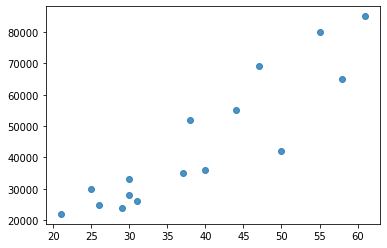

In [20]:
import seaborn as sns
sns.regplot(X, y, fit_reg=False)

En principio parece que sí podría ser factible, ya que se ve una relación (más o menos) lineal entre las dos variables.

Intenta programar el método directo de Ordinary Least Squares. Recuerda que un vector columna de unos se declara así:

In [21]:
ones = np.ones((len(X), 1))

y que se puede pegar los unos como primera columna a X así:

In [22]:
X = np.append(ones, X, axis=1)

Partiendo de aquí, y teniendo presente que el operador multiplicación de matrices es la @, calcula Beta y las predicciones del modelo a partir de las X:

In [23]:
## Solución
Beta = np.linalg.inv(X.T @ X) @ X.T @ y
preds = X @ Beta

Se puede comprobar que el modelo está bien programado viendo si realmente aproxima los datos correctamente:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


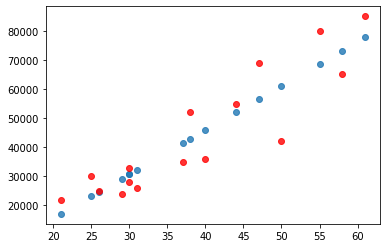

In [25]:
import seaborn as sns
X = x
sns.regplot(X, preds, fit_reg=False)
sns.regplot(X, y, fit_reg=False, color='red')

En cuanto al error que comete el modelo en sus predicciones, las métricas más habituales para regresión son el Mean Squared Error y el Mean Absolute Error:

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440868 MAE: 7209.405489439265


**Clase LinearRegression de Scikit-learn**

La clase correspondiente en Scikit-learn al método que hemos programado es LinearRegression. Podemos comprobar que nuestro modelo es correcto entrenando, haciendo predicciones y viendo si los resultados coinciden:

In [27]:
from sklearn.linear_model import LinearRegression
X = x.reshape((-1, 1))
olsr = LinearRegression()
olsr.fit(X, y)
preds = olsr.predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


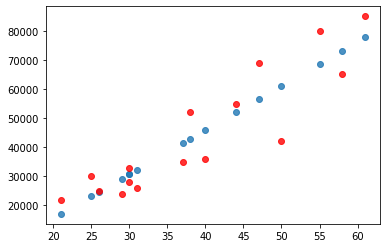

In [29]:
## Solución
import seaborn as sns
sns.regplot(X, preds, fit_reg=False)
sns.regplot(X, y, fit_reg=False, color='red')

In [30]:
## Solución
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440871 MAE: 7209.405489439262


**Programación de un wrapper compatible con scikit-learn**

Intenta programar una clase OLSRegressor para el método directo que sea compatible con Scikit-learn. Para ello, la clase debe heredar de las clases sklearn.base.BaseEstimator y sklearn.base.RegressorMixin.

También debe implementar un método fit(self, X, y) que calcule el beta a partir de X e y y lo guarde en un atributo self.beta_ y un método predict(self, X) que utilice el atributo self.beta_ calculado en fit para realizar predicciones a partir de la X.

In [35]:
from sklearn.base import BaseEstimator, RegressorMixin

class OLSRegressor(BaseEstimator, RegressorMixin):

    def fit(self, X, y):
        if len(X.shape) == 1: X = x.reshape((-1, 1))
        ones = np.ones((len(X), 1))
        X_bias = np.append(ones, X, axis=1)
        self.beta_ = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        if len(X.shape) == 1: X = x.reshape((-1, 1))
        ones = np.ones((len(X), 1))
        X_bias = np.append(ones, X, axis=1)
        return X_bias @ self.beta_

In [36]:
## PROBAMOS:
X = x
olsr = OLSRegressor()
olsr.fit(X,y)
preds = olsr.predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


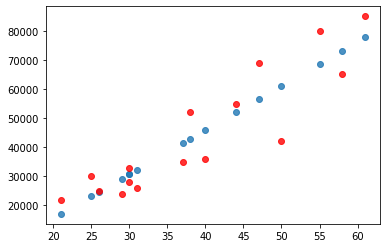

In [38]:
## Solución
import seaborn as sns
sns.regplot(X, preds, fit_reg=False)
sns.regplot(X, y, fit_reg=False, color='r')

In [39]:
# Solución
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 71814865.44440868 MAE: 7209.405489439265


Prueba ahora con el dataset de Boston Housing, que está disponible en Scikit-learn:

In [40]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
olsr = OLSRegressor()
olsr.fit(X, y)
preds = olsr.predict(X)

En este caso hay más de una variable explicativa, así que vamos a hacer la descomposición **PCA** de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


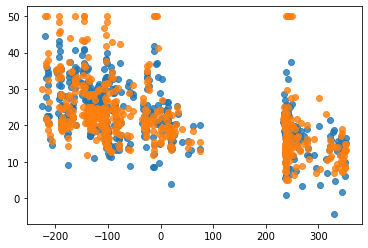

In [41]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 21.894831181729202 MAE: 3.2708628109006046


## **Regresión lineal, método iterativo (SGD)**
-----

**Clase SGDRegressor**

El método directo funciona y en sencillo de programar, pero tiene los problemas que se mencionan en los apuntes:

* las matrices pueden ser singulares y por tanto no tener inversa, lo que invalida el método
* si el conjunto de datos es muy grande, el coste de calcular la matriz inversa es demasiado alto Por ello vamos a probar el método iterativo de descenso por gradiente (SGD). En Scikit-learn se corresponde con la clase SGDRegressor. Carga el dataset de regresión Boston Housing e intenta entrenar y predecir con el modelo SGDRegressor:

In [44]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [45]:
# Solución
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor()
lr.fit(X, y)
preds = lr.predict(X)

Como en este dataset hay más de una variable explicativa, vamos a hacer PCA de X para quedarnos sólo con una dimensión y poder pintar una gráfica:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


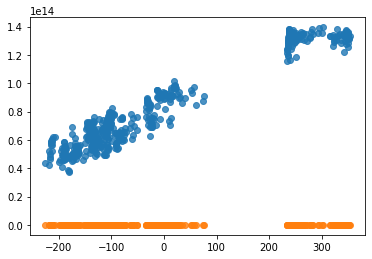

In [46]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

Las predicciones no parecen nada buenas. Veamos los errores:

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 8.244014816170477e+27 MAE: 85206320914971.6


Esta vez los resultados son muy malos. En los apuntes se indicó que al utilzar un método basado en descenso por gradiente hay que tomar una precaución porque el método tiene mucha sensibilidad a la escala de las variables explicativas. ¿Sabrías explicar de qué precaución se trata?

%%% Solución:

Hay que estandarizar las variables de entrada

A continuación se resuelve el problema utilizando el preprocesador de datos apropiado:

In [48]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X, y)
preds = lr.predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


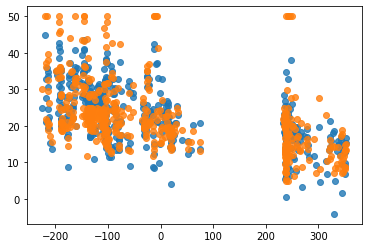

In [49]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y, preds)
mae = mean_absolute_error(y, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 21.969635822761838 MAE: 3.269019813767496


Y se puede comprobar que los resultados son correctos de nuevo.

## **Regresión logística**
----


Clase SGDClassifier
Al igual que para regresión tenemos la clase SGDRegressor, para clasificación tenemos la clase SGDClassifier. Prueba a cargar los datos del dataset Iris para clasificación (también disponibles en sklearn.datasets) y a entrenar y predecir con un modelo SGDClassifier:

In [51]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_iris(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdc', SGDClassifier())])
lr.fit(X, y)
preds = lr.predict(X)

Haz una gráfica con la primera dimensión de PCA, los targets y las predicciones del modelo, como en los ejercicios anteriores:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


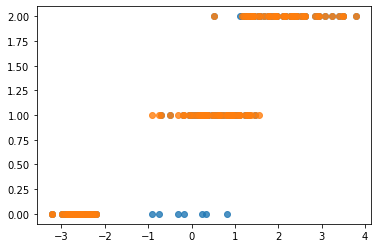

In [52]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

Y utiliza la métrica accuracy_score de sklearn.metrics para ver si el resultado es bueno:

In [53]:
## Solución
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, preds)
print("Acc: " + str(acc))

Acc: 0.9266666666666666


**Clase LogisticRegression**

Scikit-learn también proporciona la clase LogisticRegression que cuenta con métodos de entrenamiento más avanzados, regularizadores, etc. Repite el proceso con esta nueva clase:

In [54]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_iris(return_X_y=True)
lr = Pipeline([('stds', StandardScaler()), ('sgdc', LogisticRegression())])
lr.fit(X, y)
preds = lr.predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


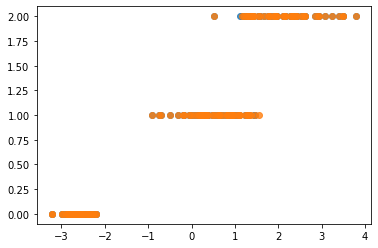

In [55]:
import seaborn as sns
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)[:, 0]
sns.regplot(X_pca, preds, fit_reg=False)
sns.regplot(X_pca, y, fit_reg=False)

In [56]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, preds)
print("Acc: " + str(acc))

Acc: 0.9733333333333334


## **Evaluación correcta del modelo**
----


Particiones de train y test
En los ejercicios previos hemos cometido un error metodológico importante a la hora de evaluar la calidad de los modelos: hemos calculado las métricas de error con el mismo dataset que hemos usado para entrenar. Esto puede hacer que los modelos caigan en sobreajuste y la estimación del error sea totalmente irreal. Para evitarlo, lo habitual es hacer una partición del dataset en train y test, o realizar una validación cruzada.

Scikit-learn ofrece una forma sencilla de separar train y test con la función train_test_split. Entrena el modelo SGDRegressor sobre Boston Housing usando una partición de train y luego calcula MSE y MAE de sus predicciones sobre test:

In [57]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = Pipeline([('stds', StandardScaler()), ('sgdr', SGDRegressor())])
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print("MSE: " + str(mse) + " MAE: " + str(mae))

MSE: 23.08415539158179 MAE: 3.010899572361387


## **NNA**
---

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
MAX_ITER = 10

In [5]:
def main():

    # Train
    data = np.loadtxt('/content/train.csv', dtype='f8', delimiter=',', skiprows=1)
    X, y = data[:, 1:], data[:, 0]
    classifier = Pipeline([('transformer', StandardScaler()),
                           ('predictor', MLPClassifier(max_iter=MAX_ITER))])
    search_space = {'predictor__hidden_layer_sizes': [[32], [32, 32],[10,10,5]]} # Capas y unidades
    estimator = GridSearchCV(classifier, search_space, cv=3)
    estimator.fit(X, y)   # Configuracion del modelo
    print('----------------------------------------')
    print('Best Meta - params: ' + str(estimator.best_params_))
    print('Best score: ' + str(estimator.best_score_))
    print('----------------------------------------')

    # Test
    X_test = np.loadtxt('/content/test.csv', dtype='f8', delimiter=',', skiprows=1)
    ids = np.arange(1, len(X_test) + 1)
    predictions = estimator.predict(X_test)
    np.savetxt('sklearn_submission.csv', np.transpose([ids, predictions]),
               fmt=('%d', '%d'), delimiter=',', header='ImageId,Label',
               comments='')


if __name__ == '__main__':
    main()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

----------------------------------------
Best Meta - params: {'predictor__hidden_layer_sizes': [32, 32]}
Best score: 0.9505238095238094
----------------------------------------


In [ ]:
def main():

    # Train
    data = np.loadtxt('/content/train.csv', dtype='f8', delimiter=',', skiprows=1)
    X, y = data[:, 1:], data[:, 0]
    classifier = Pipeline([('transformer', StandardScaler()),
                           ('predictor', MLPClassifier(max_iter=MAX_ITER))])
    search_space = {'predictor__hidden_layer_sizes': [[32], [32, 32],[10,10,5]],# Capas y unidades
                    'predictor_learning_rate_init': [0.01, 0.001, 0.0001], # learning_rate
                    'predictor_alpha': [0.00001,0.0001,0.01]} # alpha
    estimator = GridSearchCV(classifier, search_space, cv=3)
    estimator.fit(X, y)   # Configuracion del modelo
    print('----------------------------------------')
    print('Best Meta - params: ' + str(estimator.best_params_))
    print('Best score: ' + str(estimator.best_score_))
    print('----------------------------------------')

    # Test
    X_test = np.loadtxt('/content/test.csv', dtype='f8', delimiter=',', skiprows=1)
    ids = np.arange(1, len(X_test) + 1)
    predictions = estimator.predict(X_test)
    np.savetxt('sklearn_submission.csv', np.transpose([ids, predictions]),
               fmt=('%d', '%d'), delimiter=',', header='ImageId,Label',
               comments='')


if __name__ == '__main__':
    main()